# Import Libraries

In [4]:
import pandas as pd
import numpy as np

import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

# Data Analysis

In [5]:
from google.colab import drive
drive.mount('/content/drive')

fake = pd.read_csv("/content/drive/MyDrive/AICTE/Dataset/fake.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
genuine = pd.read_csv("/content/drive/MyDrive/AICTE/Dataset/true.csv")

In [8]:
genuine.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
fake['label']=1
genuine['label']=0

In [10]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [11]:
genuine.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [12]:
fake.shape

(23481, 5)

In [13]:
genuine.shape


(21417, 5)

In [14]:
articles_data = pd.concat([fake,genuine],ignore_index=True)

In [15]:
articles_data.shape

(44898, 5)

In [16]:
articles_data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [17]:
articles_data.tail()

,title,text,subject,date,label
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [18]:
articles_data.drop(columns=['subject','date','text'],inplace=True)

In [19]:
articles_data.head()

,title,label
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1
2,Sheriff David Clarke Becomes An Internet Joke...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,1
4,Pope Francis Just Called Out Donald Trump Dur...,1


# Data Pre Processing

In [20]:
word_lem=WordNetLemmatizer()

In [21]:
import nltk

# Download the punkt_tab resource
nltk.download('punkt_tab')

# Download the stopwords resource as well, as it is used in the clean_data function
nltk.download('stopwords')

# Download the wordnet resource for lemmatization
nltk.download('wordnet')

def clean_data(text):
  words = []
  word_tokens = word_tokenize(text)
  for word in word_tokens:
    # Make sure the word is not empty after cleaning
    cleaned_word = re.sub('[^a-zA-Z]','',word).lower()
    if cleaned_word and cleaned_word not in stopwords.words('english'):
      result=word_lem.lemmatize(cleaned_word)
      words.append(result)
  return ' '.join(words)

articles_data['title']=articles_data['title'].apply(clean_data)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Scaling Data

In [22]:
input=articles_data['title']
output=articles_data['label']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(input,output,test_size=0.2)

In [24]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(35918,) (8980,) (35918,) (8980,)


In [25]:
vector=TfidfVectorizer()

In [26]:
x_train_vector = vector.fit_transform(x_train)
x_test_vector = vector.transform(x_test)

# Model Creation

In [27]:
model=PassiveAggressiveClassifier(max_iter=50,random_state=7)

In [28]:
model.fit(x_train_vector, y_train)

PassiveAggressiveClassifier(max_iter=50, random_state=7)

# Model Evaluation

In [29]:
pred = model.predict(x_test_vector)

In [30]:
pred

array([0, 0, 1, ..., 0, 0, 1])

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

score = accuracy_score(y_test, pred)
score_format = score * 100
print("Model Accuracy: %0.2f%%" % score_format)

print("\nClassification Report:")
print(classification_report(y_test, pred))

Model Accuracy: 94.18%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4232
           1       0.95      0.94      0.94      4748

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



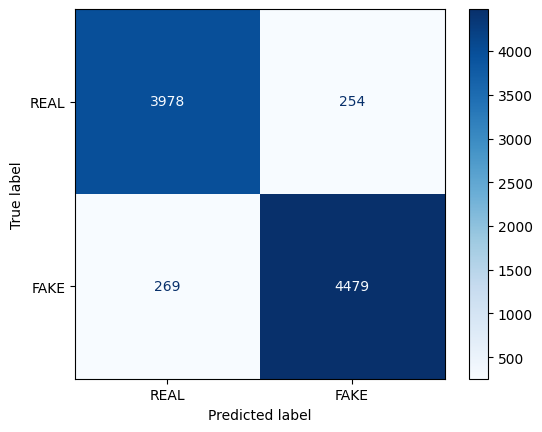

In [40]:
cm = confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["REAL", "FAKE"])
disp.plot(cmap="Blues")

In [34]:
def predict(model_name, text):
  input_dataset = pd.DataFrame([text], columns=['title'])
  input_dataset['title'] = input_dataset['title'].apply(clean_data)
  text_vector = vector.transform(input_dataset['title'])
  result = model_name.predict(text_vector)

  if result[0]==0:
    return 'This is a Genuine News'
  if result[0]==1:
    return 'This is a Fake News'

In [35]:
predict(model, ' BREAKING: Cop Finally Gets His Due, Walter Scottâ€™s Killer Sentenced To Prison (DETAILS)')

'This is a Fake News'

In [36]:
predict(model, 'U.S. military to accept transgender recruits on Monday: Pentagon')

'This is a Genuine News'

In [37]:
predict(model, 'Pope Francis Just Called Out Donald Trump During His Christmas Speech')

'This is a Fake News'